In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

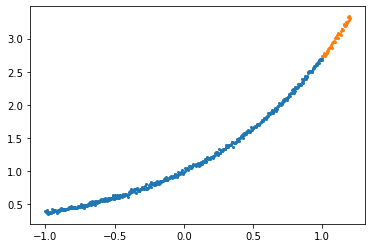

In [2]:
x_arr = torch.linspace(-1, 1, 500)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.02, size=(500,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(1, 1.2, 50)
y_val = torch.exp(x_val) + torch.normal(0, 0.02, size=(50,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [3]:
env = Environment(7, train_loader, train_epochs=100, validation_loader=val_loader)

cuda


In [4]:
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities()

Train ended in 39 s


[0.0895374846458435,
 0.11274853706359864,
 0.005279049687087535,
 0.078650581240654,
 0.013693591505289076,
 0.011177014652639627,
 0.6407455587387085]

7 ['#0000ff', '#002aea', '#0055d4', '#0080bf', '#00aaaa', '#00d594', '#00ff80']
[1] [0.0895374846458435] 0
[1] [0.11274853706359864] 1
[1] [0.005279049687087535] 2
[1] [0.078650581240654] 3
[1] [0.013693591505289076] 4
[1] [0.011177014652639627] 5
[1] [0.6407455587387085] 6


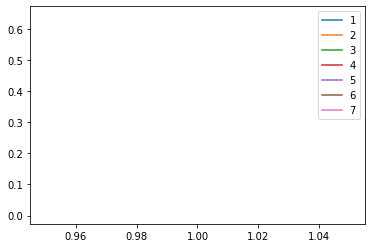

In [5]:
plot_env_history(env)

In [7]:
print(env.entities[2].gens)

{'layers': [{'type': 'Linear', 'in': 1, 'out': 39}, {'type': 'Tanh', 'in': 39, 'out': 39}, {'type': 'Sigmoid', 'in': 39, 'out': 39}, {'type': 'Linear', 'in': 39, 'out': 20}, {'type': 'ReLU', 'in': 20, 'out': 20}, {'type': 'Linear', 'in': 20, 'out': 1}], 'criterion': 'MSELoss', 'optimizer': {'momentum': 0.06964217259122552, 'name': 'SGD', 'lr': 0.05462919728802551}}


In [8]:
for i in range(5):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    print(env.validate_entities())
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.005279049687087535 2
0.011177014652639627 5
0.013693591505289076 4
0.078650581240654 3
[0.005676907021552324, 0.012312614917755127, 0.009688196163624525, 0.0035161125008016823, 0.018767047971487046, 0.8123294162750245, 0.4184682250022888]
Evo epoch 1 ended in 41 s
0.0035161125008016823 2
0.005676907021552324 2
0.009688196163624525 4
0.012312614917755127 5
[0.0037188937515020373, 0.005367717249318957, 0.011532988660037517, 1.8151625633239745, 0.004683176092803478, 0.812337555885315, 0.010698638893663884]
Evo epoch 2 ended in 38 s
0.0037188937515020373 2
0.004683176092803478 2
0.005367717249318957 2
0.010698638893663884 5
[0.007614551335573197, 0.005859095687046647, 0.010799955129623413, 0.007068649772554636, 0.004684266671538353, 0.0064711132831871505, 0.011270645409822463]
Evo epoch 3 ended in 33 s
0.004684266671538353 2
0.005859095687046647 2
0.0064711132831871505 2
0.007068649772554636 2
[0.009169234037399292, 0.00486707990989089, 0.007980496436357499, 0.010332821160554886, 0.00634

7 ['#0000ff', '#002aea', '#0055d4', '#0080bf', '#00aaaa', '#00d594', '#00ff80']
[1, 2, 3, 4, 5, 6] [0.005279049687087535, 0.0035161125008016823, 0.0037188937515020373, 0.007068649772554636, 0.0047586730867624286, 0.006221511121839285] 2
[1, 2, 3, 4, 5, 6] [0.005279049687087535, 0.005676907021552324, 0.004683176092803478, 0.005859095687046647, 0.00486707990989089, 0.004151592087000609] 2
[1, 2, 3, 4, 5, 6] [0.005279049687087535, 0.005676907021552324, 0.004683176092803478, 0.005859095687046647, 0.006346483808010816, 0.005642265900969505] 2
[1, 2, 3, 4, 5, 6] [0.005279049687087535, 0.0035161125008016823, 0.0037188937515020373, 0.007068649772554636, 0.0047586730867624286, 0.0034543465077877047] 2
[1, 2, 3, 4, 5, 6] [0.005279049687087535, 0.005676907021552324, 0.004683176092803478, 0.005859095687046647, 0.00486707990989089, 0.8124216270446777] 2
[1, 2, 3, 4, 5, 6] [0.005279049687087535, 0.005676907021552324, 0.004683176092803478, 0.005859095687046647, 0.006346483808010816, 0.010568685941398

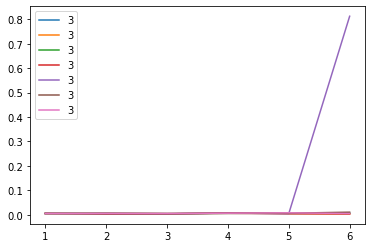

In [9]:
plot_env_history(env)

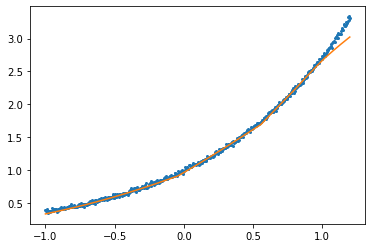

In [30]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[0].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Model")

In [25]:
print(env.entities[4].gens)

{'layers': [{'type': 'Linear', 'in': 1, 'out': 39}, {'type': 'Tanh', 'in': 39, 'out': 39}, {'type': 'Sigmoid', 'in': 39, 'out': 39}, {'type': 'Linear', 'in': 39, 'out': 23}, {'type': 'ReLU', 'in': 23, 'out': 23}, {'type': 'Linear', 'in': 23, 'out': 1}, {'type': 'Sigmoid', 'in': 1, 'out': 1}], 'criterion': 'MSELoss', 'optimizer': {'momentum': 0.06964217259122552, 'name': 'SGD', 'lr': 0.05462919728802551}}


In [31]:
for i in range(5):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    print(env.validate_entities())
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.0034543465077877047 2
0.004151592087000609 2
0.005021789316087962 2
0.005642265900969505 2
[0.007745583653450012, 0.0035717667173594237, 0.008723270148038864, 0.006468211449682712, 0.005951575674116612, 0.7386341333389282, 0.01121139608323574]
Evo epoch 1 ended in 36 s
0.0035717667173594237 2
0.005951575674116612 2
0.006468211449682712 2
0.007745583653450012 2
[0.010119086429476738, 0.0055336134135723115, 0.010284023173153401, 0.002753406944684684, 0.004296004846692085, 0.015640755891799925, 1.815162525177002]
Evo epoch 2 ended in 35 s
0.002753406944684684 2
0.004296004846692085 2
0.0055336134135723115 2
0.010119086429476738 2
[0.007931350711733103, 0.004720202265307307, 0.005569013096392154, 1.8151624870300291, 0.003581368550658226, 0.006431600861251355, 0.003993184491991997]
Evo epoch 3 ended in 34 s
0.003581368550658226 2
0.003993184491991997 2
0.004720202265307307 2
0.005569013096392154 2
[0.007306088730692864, 0.007406366728246213, 0.00905515931546688, 0.0045327704213559625, 0.8

7 ['#0000ff', '#002aea', '#0055d4', '#0080bf', '#00aaaa', '#00d594', '#00ff80']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.005279049687087535, 0.005676907021552324, 0.004683176092803478, 0.005859095687046647, 0.00486707990989089, 0.004151592087000609, 0.005951575674116612, 0.004296004846692085, 0.003581368550658226, 0.0045327704213559625, 0.006117519820109009] 2
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.005279049687087535, 0.005676907021552324, 0.004683176092803478, 0.005859095687046647, 0.00486707990989089, 0.004151592087000609, 0.005951575674116612, 0.0055336134135723115, 0.005569013096392154, 0.006104827001690865, 0.010898105204105377] 2
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.005279049687087535, 0.005676907021552324, 0.004683176092803478, 0.005859095687046647, 0.00486707990989089, 0.004151592087000609, 0.005951575674116612, 0.004296004846692085, 0.004720202265307307, 0.00704753652215004, 0.008239066563546657] 2
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.005279049687087535, 0.005676907021552324

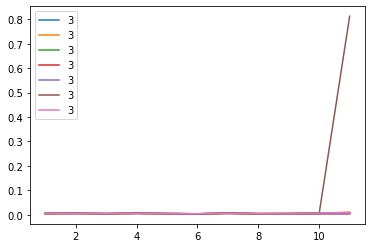

In [32]:
plot_env_history(env)